# Exercise: Data Pre-Processing and EDA

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn import metrics
%matplotlib inline

In [2]:
# Read the datafile "covid.csv"
df = pd.read_csv('covid.csv')

# Take a quick look at the dataframe
df.head()

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [3]:
df.shape

(1001, 9)

In [4]:
# Check if there are any missing or Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          995 non-null    float64
 1   sex          993 non-null    float64
 2   cough        990 non-null    float64
 3   fever        986 non-null    float64
 4   chills       997 non-null    float64
 5   sore_throat  995 non-null    float64
 6   headache     999 non-null    float64
 7   fatigue      997 non-null    float64
 8   Urgency      1001 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 70.5 KB


<Axes: >

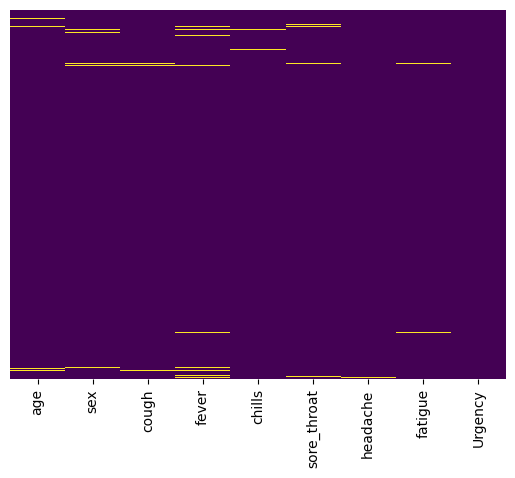

In [5]:
heatmap_missing_data = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,
                                   cmap='viridis')
heatmap_missing_data

In [6]:
### edTest(test_na) ###

# Find the number of rows with missing values
num_null = df.isnull().any(axis=1).sum()
print("Number of rows with null values:", num_null)

Number of rows with null values: 37


In [7]:
# kNN impute the missing data
# Use a k value of 5
# Crea el objeto imputador kNN con un número de vecinos predeterminado
imputer_knn = KNNImputer(n_neighbors=5)
df_predictor = df.drop('Urgency',axis=1)
df_response = df['Urgency']
# Imputa los valores faltantes en el DataFrame
df_predictor_imputed = pd.DataFrame(imputer_knn.fit_transform(df_predictor), columns=df_predictor.columns)
df_imputed = pd.concat([df_predictor_imputed,df_response],axis=1)

In [8]:
df_imputed.head()

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [9]:
df_imputed.shape

(1001, 9)

In [10]:
### edTest(test_impute) ###
# Replace the original dataframe with the imputed data, continue to use df for the dataframe
# Reemplaza los valores imputados en el DataFrame original
df = df_imputed.copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1001 non-null   float64
 1   sex          1001 non-null   float64
 2   cough        1001 non-null   float64
 3   fever        1001 non-null   float64
 4   chills       1001 non-null   float64
 5   sore_throat  1001 non-null   float64
 6   headache     1001 non-null   float64
 7   fatigue      1001 non-null   float64
 8   Urgency      1001 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 70.5 KB


In [12]:
df.head()

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


<Axes: >

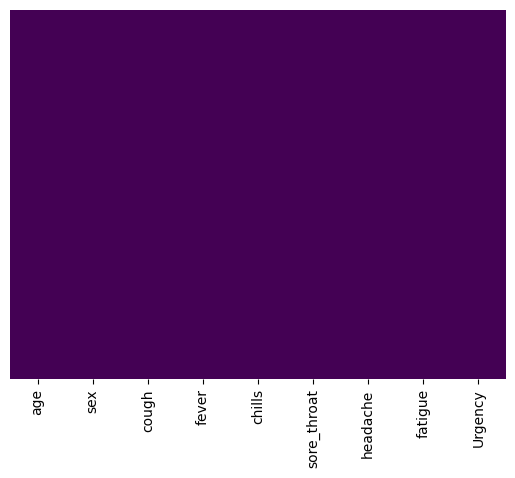

In [13]:
heatmap_missing_data_2 = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,
                                   cmap='viridis')
heatmap_missing_data_2

In [14]:
df['age'].unique()

array([30. , 47. , 49. , 50. , 59. , 38. , 45. , 42. , 44. , 65. , 43. ,
       40. , 66. , 36. , 63. , 78. , 76. , 48. , 38.4, 62. , 46. , 34. ,
       41. , 20. , 54. , 33. ,  2. , 29. , 61. , 51. , 27. , 53. , 52. ,
       28. , 31. , 39. , 37. , 55. , 32. , 24. , 38.8, 22. , 60. , 35. ,
       64. , 70. , 21. , 67. , 56. , 25. , 16. , 26. , 71. , 80. , 77. ,
       72. , 73. , 57. , 10. , 75. , 74. ,  5. , 68. , 69. ,  9. ,  1. ,
       23. ,  0. , 79. , 58. , 18. , 85. , 12. , 13. ,  3. , 19. ,  8. ,
        7. ,  4. , 17. , 45.2, 81. ])

C:\Users\cristian.aparicio\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

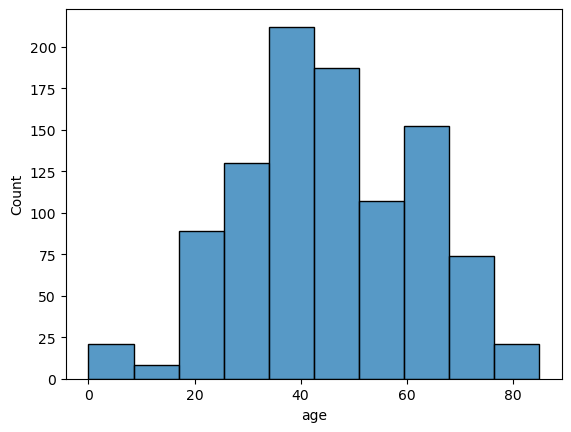

In [15]:
# Plot an appropriate graph to answer the following question
# Which age group has the most urgent need for a hospital bed?
sns.histplot(data=df,x='age',bins=10)

In [16]:
# Plot an appropriate graph to answer the following question    
# Among the following symptoms, which is the most common one for patients with urgent need of hospitalization?
df_grouped = df.groupby('Urgency').sum().reset_index()
df_grouped.rename(columns={'index':'Urgency'},inplace=True)
df_grouped

,Urgency,age,sex,cough,fever,chills,sore_throat,headache,fatigue
0,0,23735.4,296.6,111.0,204.0,15.0,35.2,13.0,18.0
1,1,21416.0,244.6,32.8,121.0,0.0,2.2,1.0,3.0


In [17]:
df_grouped_1 = df_grouped[df_grouped['Urgency']==1]
df_grouped_1

,Urgency,age,sex,cough,fever,chills,sore_throat,headache,fatigue
1,1,21416.0,244.6,32.8,121.0,0.0,2.2,1.0,3.0


Text(0, 0.5, 'Valor')

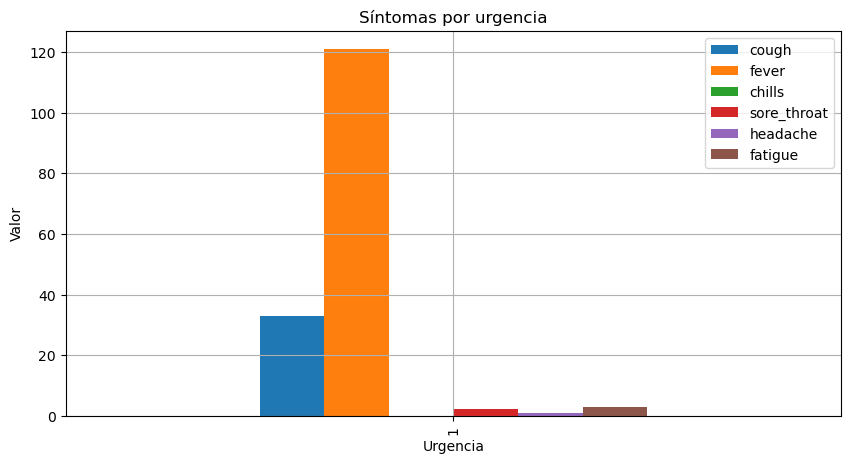

In [18]:
df_grouped_1.plot(x='Urgency', y=['cough','fever','chills','sore_throat','headache','fatigue'], kind='bar', figsize=(10, 5), grid=True)
plt.title("Síntomas por urgencia")
plt.xlabel("Urgencia")
plt.ylabel("Valor")

Text(0, 0.5, 'Valor')

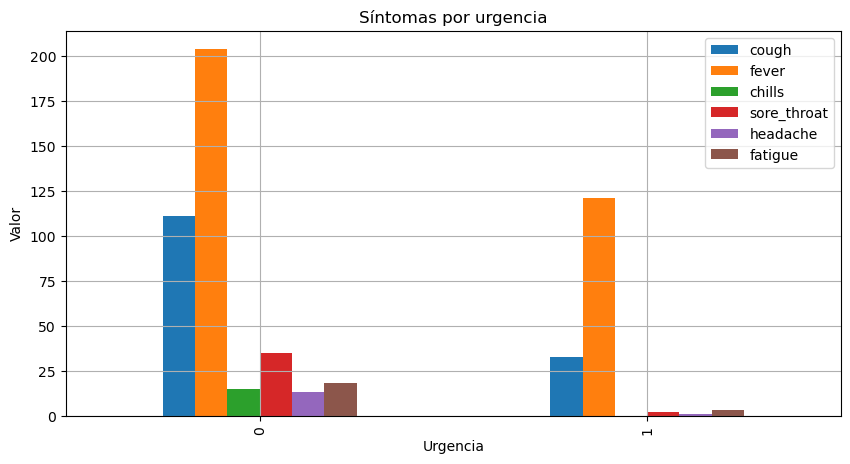

In [19]:
# Plot an appropriate graph to answer the following question    
# As compared to patients with urgent need of hospitalization, patients with no urgency have cough as a more common symptom?
df_grouped.plot(x='Urgency', y=['cough','fever','chills','sore_throat','headache','fatigue'], kind='bar', figsize=(10, 5), grid=True)
plt.title("Síntomas por urgencia")
plt.xlabel("Urgencia")
plt.ylabel("Valor")


In [20]:
### edTest(test_split) ###
# Split the data into train and test sets with 70% for training
# Use random state of 60 and set of data as the train split
df_train, df_test = train_test_split(df, train_size=0.7, random_state=60)
print(df_train.shape)
print(df_test.shape)

(700, 9)
(301, 9)


In [21]:
# Save the train data into a csv called "covid_train.csv"
# Remember to not include the default indices
df_train.to_csv('covid_train.csv',index=False)

# Save the test data into a csv called "covid_test.csv"
# Remember to not include the default indices
df_test.to_csv('covid_test.csv',index=False)


# Exercise: Prediction accuracy

In [22]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
%matplotlib inline

In [23]:
# Read the datafile "covid_train.csv"
df_covid_train = pd.read_csv('covid_train.csv')

# Take a quick look at the dataframe
df_covid_train.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,37.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,35.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [24]:
df_covid_train.shape

(700, 9)

In [25]:
# Read the datafile "covid_test.csv"
df_covid_test = pd.read_csv('covid_test.csv')

# Take a quick look at the dataframe
df_covid_test.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
df_covid_test.shape

(301, 9)

In [27]:
df_covid_train.columns

Index(['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache',
       'fatigue', 'Urgency'],
      dtype='object')

In [28]:
# Get the train predictors
X_train = df_covid_train[['age','sex','cough','fever','chills','sore_throat','headache','fatigue']]

# Get the train response variable
y_train = df_covid_train['Urgency']


In [29]:
# Get the test predictors
X_test = df_covid_test[['age','sex','cough','fever','chills','sore_throat','headache','fatigue']]

# Get the test response variable
y_test = df_covid_test['Urgency']


In [30]:
### edTest(test_model) ###

# Define your classification model
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the train data
model.fit(X_train , y_train)

KNeighborsClassifier()

In [31]:
### edTest(test_accuracy) ###

# Predict and compute the accuracy on the test data
yhatmodel_class = model.predict(X_train)
yhatmodel_prob = model.predict_proba(X_train)
print(yhatmodel_class[:10])
print(yhatmodel_prob[:10])

model_accuracy_train = model.score(X_train, y_train)
model_accuracy_test = model.score(X_test, y_test)
print(f"Model Accuracy on the train data is {model_accuracy_train}")
print(f"Model Accuracy on the test data is {model_accuracy_test}")


[0 1 1 0 0 0 1 1 0 1]
[[0.8 0.2]
 [0.4 0.6]
 [0.  1. ]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [0.  1. ]
 [0.4 0.6]
 [0.6 0.4]
 [0.2 0.8]]
Model Accuracy on the train data is 0.7157142857142857
Model Accuracy on the test data is 0.6411960132890365


# Exercise: Evaluating predictions with other metrics

In [32]:
# Import necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix


In [33]:
# Read the datafile "covid_train.csv"
df_covid_train_ex_2 = pd.read_csv('covid_train.csv')

# Take a quick look at the dataframe
df_covid_train_ex_2.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,37.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,35.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [34]:
df_covid_train_ex_2.shape

(700, 9)

In [35]:
# Read the datafile "covid_test.csv"
df_covid_test_ex_2 = pd.read_csv('covid_test.csv')

# Take a quick look at the dataframe
df_covid_test_ex_2.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [36]:
df_covid_test_ex_2.shape

(301, 9)

In [37]:
# Get the train predictors
X_train_ex_2 = df_covid_train_ex_2[['age','sex','cough','fever','chills','sore_throat','headache','fatigue']]

# Get the train response variable
y_train_ex_2 = df_covid_train_ex_2['Urgency']


In [38]:
# Get the test predictors
X_test_ex_2 = df_covid_test_ex_2[['age','sex','cough','fever','chills','sore_throat','headache','fatigue']]

# Get the test response variable
y_test_ex_2 = df_covid_test_ex_2['Urgency']


In [39]:
### edTest(test_model) ###

# Define a kNN classification model with k = 7
knn_model = KNeighborsClassifier(n_neighbors=7)

# Fit the above model on the train data
knn_model.fit(X_train_ex_2,y_train_ex_2)

# Define a Logistic Regression model with max_iter as 10000 and C as 0.1 (leave all other parameters at default values)
log_model = LogisticRegression(max_iter = 10000,C=0.1)

# Fit the Logistic Regression model on the train data
log_model.fit(X_train_ex_2,y_train_ex_2)


LogisticRegression(C=0.1, max_iter=10000)

Now it is time to evaluate the models.

Create a dictionary called `metric_scores` which has keys `'Accuracy'`, `'Recall'`, `'Specificity'`, `'Precision'`, and `'F1-score'`. The value associated with each key should a list with a length 2, the first element being knn_model corresponding metric score and the second element being log_model corresponding metric score. All scores should be made on the **test** data.

Ex: metric_scores["F1-score"] = [knn_f1,log_f1]

In [40]:
# Suponiendo que 'knn_model' y 'log_model' son los modelos entrenados de KNN y regresión logística respectivamente
# y que 'X_test' y 'y_test' son los datos de prueba

# Función para calcular la especificidad
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

# Calcular las métricas para knn_model
knn_pred = knn_model.predict(X_test_ex_2)
knn_scores = [
    accuracy_score(y_test_ex_2, knn_pred),
    recall_score(y_test_ex_2, knn_pred),
    specificity_score(y_test_ex_2, knn_pred),
    precision_score(y_test_ex_2, knn_pred),
    f1_score(y_test_ex_2, knn_pred)
]

# Calcular las métricas para log_model
log_pred = log_model.predict(X_test_ex_2)
log_scores = [
    accuracy_score(y_test_ex_2, log_pred),
    recall_score(y_test_ex_2, log_pred),
    specificity_score(y_test_ex_2, log_pred),
    precision_score(y_test_ex_2, log_pred),
    f1_score(y_test_ex_2, log_pred)
]

# Crear el diccionario metric_scores
metric_scores = {
    'Accuracy': [knn_scores[0], log_scores[0]],
    'Recall': [knn_scores[1], log_scores[1]],
    'Specificity': [knn_scores[2], log_scores[2]],
    'Precision': [knn_scores[3], log_scores[3]],
    'F1-score': [knn_scores[4], log_scores[4]]
}

In [41]:
### edTest(test_metrics) ###

# Display your results

# Imprimir el diccionario de puntuaciones métricas
print(metric_scores)

{'Accuracy': [0.6677740863787376, 0.6079734219269103], 'Recall': [0.7163120567375887, 0.7163120567375887], 'Specificity': [0.625, 0.5125], 'Precision': [0.6273291925465838, 0.5642458100558659], 'F1-score': [0.6688741721854304, 0.63125]}


#  Exercise: Plotting the ROC curve

In [42]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score
%matplotlib inline

In [43]:
# Read the datafile "covid_train.csv"
df_covid_train_ex_3 = pd.read_csv('covid_train.csv')

# Take a quick look at the dataframe
df_covid_train_ex_3.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,37.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,35.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [44]:
df_covid_train_ex_3.shape

(700, 9)

In [45]:
# Read the datafile "covid_test.csv"
df_covid_test_ex_3 = pd.read_csv('covid_test.csv')

# Take a quick look at the dataframe
df_covid_test_ex_3.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [46]:
df_covid_test_ex_3.shape

(301, 9)

In [47]:
### edTest(test_Xy) ###

# Get the train predictors
X_train_ex_3 = df_covid_train_ex_3[['age','sex','cough','fever','chills','sore_throat','headache','fatigue']]

# Get the train response variable
y_train_ex_3 = df_covid_train_ex_3['Urgency']

# Get the test predictors
X_test_ex_3 = df_covid_test_ex_3[['age','sex','cough','fever','chills','sore_throat','headache','fatigue']]

# Get the test response variable
y_test_ex_3 = df_covid_test_ex_3['Urgency']

We want to compare two different classifiers: kNN and logistic regression.

First, let's create a fit a kNN model and get's its predicted probabilities for the positive class on the test data.

**Hint:** Remember that the `predict_proba` method returns probabilities for all classes. We only want the probabilities for the positive class (i.e., $y = 1$). 

In [48]:
### edTest(test_kNN) ###

# Define a kNN classification model with k = 7
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the above model on the train data
knn.fit(X_train_ex_3,y_train_ex_3)

# Predict probabilities for the positive class on the test data using the kNN model
y_pred_knn = knn.predict_proba(X_test_ex_3)[:, 1]
y_pred_knn.shape

(301,)

In [49]:
np.unique(y_pred_knn)

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

In [50]:
### edTest(test_logreg) ###

# Define a Logistic Regression model with max_iter as 10000, C as 0.1, and a random_state of 42
logreg = LogisticRegression(max_iter=10000, C=0.1, random_state=42)

# Fit the Logistic Regression model on the train data
logreg.fit(X_train_ex_3,y_train_ex_3)

# Predict probabilities for the positive class on the test data using the logistic regression model
y_pred_logreg = logreg.predict_proba(X_test_ex_3)[:, 1]
y_pred_logreg.shape

(301,)

In [51]:
np.unique(y_pred_logreg)

array([0.1215718 , 0.17616415, 0.1818136 , 0.19661332, 0.19689459,
       0.19697513, 0.20292754, 0.21699066, 0.21737983, 0.21961265,
       0.22377701, 0.23253235, 0.23674521, 0.24842086, 0.25309165,
       0.25512566, 0.26989094, 0.2723474 , 0.27367327, 0.27841077,
       0.27972841, 0.28195146, 0.28447492, 0.28956242, 0.29470344,
       0.2950735 , 0.32157084, 0.32667181, 0.33098251, 0.33251334,
       0.33361979, 0.35169331, 0.35345871, 0.35598315, 0.36311221,
       0.364391  , 0.36611   , 0.36778827, 0.36872091, 0.36888103,
       0.36941409, 0.37522404, 0.38235521, 0.38640808, 0.39231902,
       0.39713667, 0.39839234, 0.39881039, 0.40723171, 0.40735465,
       0.41210829, 0.41223169, 0.41478288, 0.42244156, 0.4257881 ,
       0.42724433, 0.42736896, 0.42908818, 0.43003064, 0.43651898,
       0.43945347, 0.44251784, 0.44257551, 0.44282261, 0.44839887,
       0.4486595 , 0.45173633, 0.4543756 , 0.45481686, 0.45494314,
       0.4574591 , 0.45790085, 0.45802727, 0.46420494, 0.46717

#### ROC Curve Review

The Bayes threshold of a binary classifier is the value for which all predicted probabilities greater than or equal to that value are labeled as the positive class. For example, a classifier with a Bayes threshold of 0.6 will classify all observations with a predicted probability, $p \geq 0.6$, as the positive class (1) and all observations with a predicted probability, $p < 0.6$, as the negative class (0).

The ROC curve shows us a model's false positive  and true positive rates across different settings of the Bayes Threshold. 

Recall that:
$$\text{False Positive Rate} = \frac{FP}{TN + FP}$$
$$\text{True Positive Rate} = \frac{TP}{TP + FN}$$

We will compute the false positve rate (FPR) and true positive rate (TPR) for a range of thresholds and use these values to plot ROC curves for both the kNN and the logistic regression models.

#### Thresholds

First, we need to generate a range of thresholds to use for turning our models' probability predictions into class labels. One naive approach might be to simply create a list of evenly spaced values between 0 and 1 and use these for both models. But this is not ideal. Consider the fact that some threshold changes will not actually affect the model's classification labels.

Example: if a model predicts probabilities `[0.54, 0.77, 0.79]` for 3 observations, all thresholds in the half-open interval (0.54, 0.77] will produce the exact same class labels: `[0, 1, 1]`

Another issue is that we may fail to see all changes in the class labels if our set of thresholds is not sufficiently granular. Consider the example of the 3 predicted probabilities above once more. If we use thresholds in steps of 0.05 (0, 0.05, 0.1, ..., 0.95, 1) we would only ever see class label predictions of [0, 1, 1] and [0, 0, 0]. We would miss an important threshold like 0.78 which would produce the class lables [0, 0, 1], potentially giving us a different TPR and FPR.

Our approach will be to evaluate just those thresholds that result in different class label predictions. And these precise thresholds will depend on our model.

Complete the `get_thresholds` function which takes a model's predicted probabilities on the test set and returns an array of thresholds to be considered.

In [52]:
def get_thresholds(y_pred_proba):
    # We only need to consider unique predicted probabilities
    unique_probas = np.unique(y_pred_proba)
    # Sort unique probabilities in descending order
    unique_probas_sorted = np.sort(unique_probas)[::-1]
   
    # We'll also add some additional thresholds to our set
    # This ensures our ROC curves reach the corners of the plot, (0,0) and (1,1)
    
    # Insert 1.1 at the beginning of the threshold array
    # 1.1 may seem like an odd threshold, but a value greater than 1
    # is required if we want the ROC curve to reach the lower left corner
    # (0 fpr, 0 tpr) considering one of our models produces probability predictions of 1
    thresholds = np.insert(unique_probas_sorted, 0, 1.1)
    # Append 0 to the end of the thresholds
    thresholds = np.append(thresholds, 0)
    return thresholds

In [53]:
### edTest(test_thresholds) ###

knn_thresholds = get_thresholds(y_pred_knn)

logreg_thresholds = get_thresholds(y_pred_logreg)

print(knn_thresholds.shape)
print(logreg_thresholds.shape)

(10,)
(170,)


In [54]:
### edTest(test_fpr) ###

def get_fpr(y_true, y_pred_proba, threshold):
    # Ensure y_true and y_pred_proba have the same length
    if len(y_true) != len(y_pred_proba):
        raise ValueError("Lengths of y_true and y_pred_proba must be the same.")
    
    # Ensure threshold is within the range of [0, 1]
    if not (-1 <= threshold <= 2):
        raise ValueError("Threshold must be between 0 and 1.")

    # Threshold the predicted probabilities
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Calculate the number of false positives
    false_positives = np.sum((y_pred == 1) & (y_true == 0))
    
    # Calculate the total number of true negatives and false positives
    total_negatives = np.sum(y_true == 0)
    
    # Calculate the False Positive Rate
    fpr = false_positives / total_negatives
    
    return fpr

def get_fpr_for_thresholds(y_true, y_pred_proba, thresholds):
    fprs = []
    for threshold in thresholds:
        fpr = get_fpr(y_true, y_pred_proba, threshold)
        fprs.append(fpr)
    return fprs

In [55]:
### edTest(test_tpr) ###

def get_tpr(y_true, y_pred_proba, threshold):
    # Asegúrate de que y_true y y_pred_proba tengan la misma longitud
    if len(y_true) != len(y_pred_proba):
        raise ValueError("Las longitudes de y_true y y_pred_proba deben ser iguales.")
    
    # Asegúrate de que el umbral esté dentro del rango [0, 1]
    if not (-1 <= threshold <= 2):
        raise ValueError("El umbral debe estar entre 0 y 1.")

    # Aplica el umbral a las probabilidades predichas
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Calcula el número de verdaderos positivos
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    
    # Calcula el número total de verdaderos positivos y falsos negativos
    total_positives = np.sum(y_true == 1)
    
    # Calcula la tasa de verdaderos positivos (TPR)
    tpr = true_positives / total_positives
    
    return tpr

def get_tpr_for_thresholds(y_true, y_pred_proba, thresholds):
    tprs = []
    for threshold in thresholds:
        tpr = get_tpr(y_true, y_pred_proba, threshold)
        tprs.append(tpr)
    return tprs

#### FPR & TPR

Now we can use the true $y$ class label and the predicted probabilities to determine the the fpr and tpr on the test data for a specific threshold. Complete the `get_fpr` and `get_tpr` functions below.

In [56]:
### edTest(test_fpr_tpr) ###
# FPR for the kNN at each of its thresholds
knn_fpr = get_fpr_for_thresholds(y_test_ex_3, y_pred_knn, knn_thresholds)
# TPR for the kNN at each of its thresholds
knn_tpr = get_tpr_for_thresholds(y_test_ex_3, y_pred_knn, knn_thresholds)

# TPR for the logistic model at each of its thresholds
logreg_tpr = get_tpr_for_thresholds(y_test_ex_3, y_pred_logreg, logreg_thresholds)
# FPR for the logistic model at each of its thresholds
logreg_fpr = get_fpr_for_thresholds(y_test_ex_3, y_pred_logreg, logreg_thresholds)

#### Area Under the Curve

The AUC gives us an idea as to how well our model does across *all* thresholds.

For our final calculations, use each model's predicted probabilities to compute its test AUC with the help of SKLearn's `roc_auc_score` function.

In [57]:
### edTest(test_auc) ###

# Compute the ROC AUC score of the kNN model
knn_auc = roc_auc_score(y_test_ex_3, y_pred_knn)

# Compute the ROC AUC score of the logistic model
logreg_auc = roc_auc_score(y_test_ex_3, y_pred_logreg)

You're ready to visualize your results!

Most of the code is provided. You just need to fill in the values to be plotted for the two models' ROC curves.

Remember that the convention is that false positive rate is on the $x$-axis and true positive rate is on the $y$-axis.

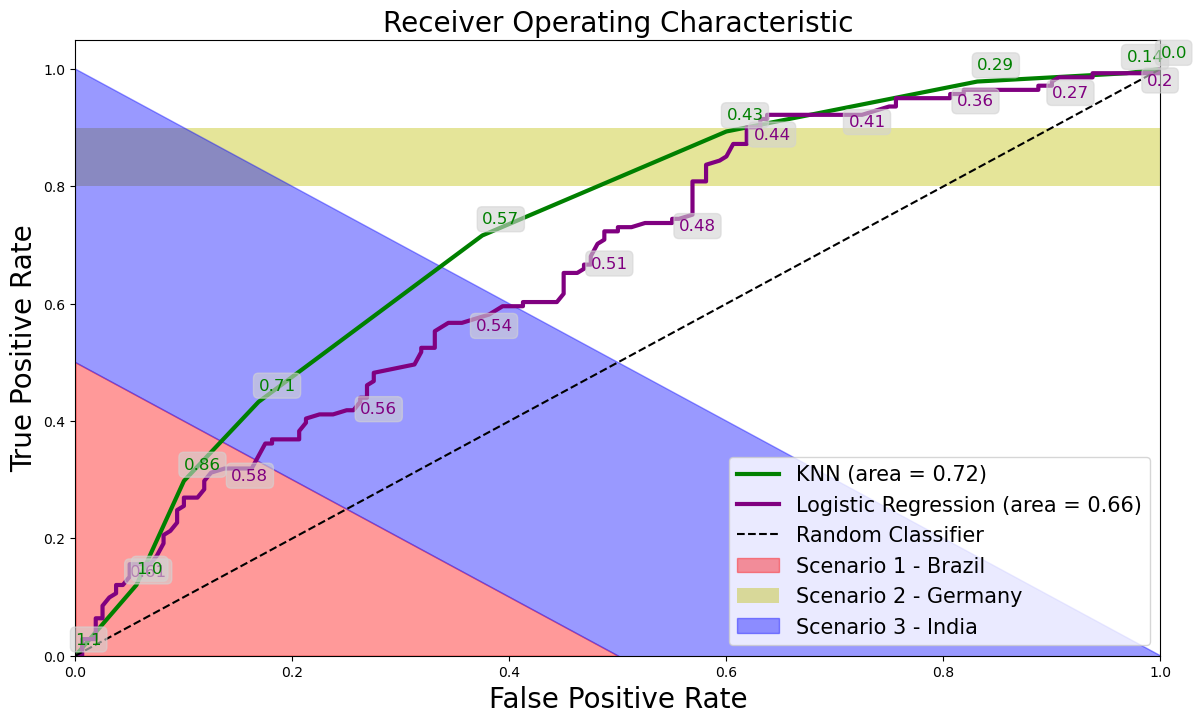

In [58]:
### edTest(test_plot) ###

# Area under curve - Logistic Regression & kNN
fig, ax = plt.subplots(figsize = (14,8))

# Plot KNN Regression ROC Curve
ax.plot(knn_fpr,
        knn_tpr,
        label=f'KNN (area = {knn_auc:.2f})',
        color='g',
        lw=3)

# Plot Logistic Regression ROC Curve
ax.plot(logreg_fpr,
        logreg_tpr,
        label=f'Logistic Regression (area = {logreg_auc:.2f})',
        color = 'purple',
        lw=3)

# Threshold annotations
label_kwargs = {}
label_kwargs['bbox'] = dict(
    boxstyle='round, pad=0.3', color='lightgray', alpha=0.6
)
eps = 0.02 # offset
for i in range(0, len(logreg_fpr),15):
    threshold = str(np.round(logreg_thresholds[i], 2))
    ax.annotate(threshold, (logreg_fpr[i], logreg_tpr[i]-eps), fontsize=12, color='purple', **label_kwargs)

for i in range(0, len(knn_fpr)-1):
    threshold = str(np.round(knn_thresholds[i], 2))
    ax.annotate(threshold, (knn_fpr[i], knn_tpr[i]+eps), fontsize=12, color='green', **label_kwargs)

# Plot diagonal line representing a random classifier
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Scenario 1 - Brazil
ax.fill_between([0,0.5],[0.5,0], color = 'red', alpha = 0.4, label='Scenario 1 - Brazil');

# Scenario 2 - Germany
ax.axhspan(0.8, 0.9, facecolor='y', alpha=0.4, label = 'Scenario 2 - Germany');

# Scenario 3 - India
ax.fill_between([0,1],[1,0],[0.5,-0.5], alpha = 0.4, color = 'blue', label = 'Scenario 3 - India');

ax.set_xlim([0.0, 1.0]);
ax.set_ylim([0.0, 1.05]);
ax.set_xlabel('False Positive Rate', fontsize=20)
ax.set_ylabel('True Positive Rate', fontsize=20)
ax.set_title('Receiver Operating Characteristic', fontsize=20)
ax.legend(loc="lower right", fontsize=15)
plt.show()